## How do Reviews Impact Movies?

####Jonathan Ting, Krissy Wong 

###Clean and merge IMDB and movie genre datasets 


In [ ]:
# import packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load datasets (For Krissy Drive)

movie_genre = pd.read_csv('/content/drive/MyDrive/BSAN 6200/Project/clean_movie_genre.csv')

imdb_reviews = pd.read_csv('/content/drive/MyDrive/BSAN 6200/Project/IMBD_reviews.csv')

In [ ]:
# Load datasets (for Jonathan Drive)

movie_genre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/clean_movie_genre.csv')

imdb_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/IMBD_reviews.csv')

FileNotFoundError: ignored

In [ ]:
# Check the head of imdb_reviews 

imdb_reviews.tail()

,Movie,Date,Stars,Useful Votes,Total Votes,Review
171204,Killer Elite,2/19/2015,6,3.0,3.0,"Stirring as well as non-stop action movie , be..."
171205,Killer Elite,1/15/2012,3,9.0,15.0,Should have been so much better than this. The...
171206,Killer Elite,9/30/2012,2,14.0,25.0,OK movie in a cut-out type of entertainment. Y...
171207,Killer Elite,9/27/2011,8,14.0,25.0,This movie was far more textured and interesti...
171208,Killer Elite,5/18/2014,6,3.0,4.0,Based on a true story?? It's 1980. Danny (Jaso...


In [ ]:
# Check the head of movie_genre
movie_genre.head()

,Movie,Type,Genre
0,Burke & Hare,movie,Horror
1,Bury Me an Angel,movie,"Action,Drama"
2,The Bus Is Coming,movie,Drama
3,The Buttercup Chain,movie,"Drama,Romance"
4,Bárbara,movie,"Comedy,Drama"


In [ ]:
# Merge imdb_reviews with movie_genre 

# rows in amazon_reviews and team2 with the same text 
clean_imdb_reviews = pd.merge(imdb_reviews, movie_genre, how='left', on = 'Movie')

clean_imdb_reviews

,Movie,Date,Stars,Useful Votes,Total Votes,Review,Type,Genre
0,Inception,8/22/2010,9,1572.0,1813.0,I'd like to keep my review rather to the point...,movie,"Action,Adventure,Sci-Fi"
1,Inception,7/10/2010,10,1770.0,2568.0,What is the most resilient parasite? An Idea! ...,movie,"Action,Adventure,Sci-Fi"
2,Inception,7/12/2010,10,1401.0,2303.0,Usually I try to be careful with over hyping a...,movie,"Action,Adventure,Sci-Fi"
3,Inception,7/13/2010,10,1150.0,1825.0,Films about dreams and the subconscious are us...,movie,"Action,Adventure,Sci-Fi"
4,Inception,7/9/2010,10,1102.0,1780.0,"I saw Memento very recently, something that tu...",movie,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
372795,Killer Elite,2/19/2015,6,3.0,3.0,"Stirring as well as non-stop action movie , be...",movie,"Action,Crime,Thriller"
372796,Killer Elite,1/15/2012,3,9.0,15.0,Should have been so much better than this. The...,movie,"Action,Crime,Thriller"
372797,Killer Elite,9/30/2012,2,14.0,25.0,OK movie in a cut-out type of entertainment. Y...,movie,"Action,Crime,Thriller"
372798,Killer Elite,9/27/2011,8,14.0,25.0,This movie was far more textured and interesti...,movie,"Action,Crime,Thriller"


### Exploratory Data Analysis to explore the dataset 

In [ ]:
clean_imdb_reviews.describe()

,Stars,Useful Votes,Total Votes
count,372800.000000,372752.000000,372752.000000
mean,6.438476,9.956089,19.377189
std,2.861723,43.803893,71.780640
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,2.000000
50%,7.000000,2.000000,6.000000
75%,9.000000,6.000000,13.000000
max,10.000000,3716.000000,5610.000000


In [ ]:
clean_imdb_reviews.count()


Movie           372800
Date            372800
Stars           372800
Useful Votes    372752
Total Votes     372752
Review          372800
Type            334384
Genre           334384
dtype: int64

In [ ]:
clean_imdb_reviews.count()

Movie           372800
Date            372800
Stars           372800
Useful Votes    372752
Total Votes     372752
Review          372800
Type            334384
Genre           334384
dtype: int64

In [ ]:
clean_imdb_reviews.shape

(372800, 8)

In [ ]:
clean_imdb_reviews.isnull().sum()

Movie               0
Date                0
Stars               0
Useful Votes       48
Total Votes        48
Review              0
Type            38416
Genre           38416
dtype: int64

In [ ]:
print(clean_imdb_reviews.nunique())

Movie              320
Date              2467
Stars               10
Useful Votes       670
Total Votes        947
Review          170935
Type                 1
Genre              169
dtype: int64


In [ ]:
clean_imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372800 entries, 0 to 372799
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Movie         372800 non-null  object 
 1   Date          372800 non-null  object 
 2   Stars         372800 non-null  int64  
 3   Useful Votes  372752 non-null  float64
 4   Total Votes   372752 non-null  float64
 5   Review        372800 non-null  object 
 6   Type          334384 non-null  object 
 7   Genre         334384 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 25.6+ MB


### **Take Sample of Main Dataset for Faster Processing**

In [ ]:
clean_imdb_reviews_sample = clean_imdb_reviews.sample(n=40000)

In [ ]:
clean_imdb_reviews_sample.to_csv('clean_imdb_sample.csv')

In [ ]:
dt.to_csv('C:/Users/abc/Desktop/file_name.csv')

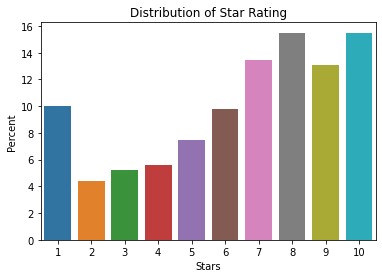

In [ ]:
# Use bar plot to visualize distributions of star ratings 
ax = sns.barplot(data=clean_imdb_reviews, x='Stars', y='Stars', estimator=lambda x: len(x) / len(clean_imdb_reviews) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Star Rating')
plt.show()

####Distinguish between reviews that have the highest and lowest ratings. 

In [ ]:
# examine the class distribution of stars in imdb reviews
clean_imdb_reviews.Stars.value_counts().sort_index()

1     37229
2     16425
3     19450
4     20900
5     27718
6     36621
7     50080
8     57785
9     48841
10    57751
Name: Stars, dtype: int64

In [ ]:
# create a new DataFrame by using the OR condition and the bracket notations
# that only contains the 10-star and 1-star reviews
imdb_best_worst = clean_imdb_reviews[(clean_imdb_reviews.Stars==10) | (clean_imdb_reviews.Stars==1)]
imdb_best_worst.head()

,Movie,Date,Stars,Useful Votes,Total Votes,Review,Type,Genre
1,Inception,7/10/2010,10,1770.0,2568.0,What is the most resilient parasite? An Idea! ...,movie,"Action,Adventure,Sci-Fi"
2,Inception,7/12/2010,10,1401.0,2303.0,Usually I try to be careful with over hyping a...,movie,"Action,Adventure,Sci-Fi"
3,Inception,7/13/2010,10,1150.0,1825.0,Films about dreams and the subconscious are us...,movie,"Action,Adventure,Sci-Fi"
4,Inception,7/9/2010,10,1102.0,1780.0,"I saw Memento very recently, something that tu...",movie,"Action,Adventure,Sci-Fi"
5,Inception,7/15/2010,10,869.0,1344.0,"Dom Cobb leads a highly skilled team, speciali...",movie,"Action,Adventure,Sci-Fi"


In [ ]:
# examine the shape
imdb_best_worst.shape

(94980, 8)

In [ ]:
# define X and y
X = imdb_best_worst.Review
y = imdb_best_worst.Stars

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# examine the object shapes

print(X_train.shape)
print(X_test.shape)

(71235,)
(23745,)


### Use wordcloud to visualize most common words that are in 1 star and 10 star ratings. 

In [ ]:
def wordcloud(df, posneg):
  pn_string = []
  for t in imdb_best_worst['Review']:
    pn_string.append(t)
  pn_string = pd.Series(pn_string).str.cat(sep=' ')
  if posneg == 1:
    c = 'autumn'
    bc = 'black'
  else:
    c = 'summer'
    bc = 'white'
  wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap=c,background_color=bc).generate(pn_string) 
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

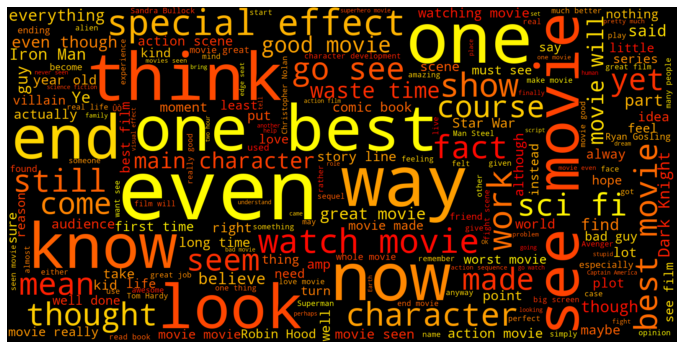

In [ ]:
wordcloud(imdb_best_worst, 1)

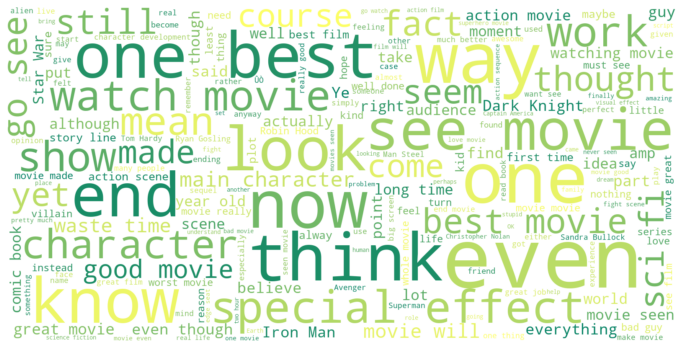

In [ ]:
wordcloud(imdb_best_worst, 10)

### Create Sentiment Analysis to analyze subjectivity and sentiments of movie reviews 

##### Since our file contains over 300,000 rows, we decided to create a sample of 10% of the dataset, whch will contain 30,000 rows. 

In [ ]:
clean_sample = clean_imdb_reviews.sample(n=30000)

In [ ]:
clean_sample.head()

,Movie,Date,Stars,Useful Votes,Total Votes,Review,Type,Genre
344664,Cinderella,4/4/2015,9,6.0,24.0,What is with all the hate? I've seen so many o...,movie,"Comedy,Family,Fantasy"
237646,Inception,8/16/2010,10,2.0,8.0,"I saw this film last night, and was amazed. A ...",movie,"Action,Adventure,Sci-Fi"
13374,Sucker Punch,3/27/2011,1,227.0,435.0,I'm not sure how this movie got such rave revi...,movie,"Comedy,Crime,Drama"
139737,Captain America The First Avenger,8/8/2012,7,0.0,1.0,I didn't really have any expectations going in...,NaN,NaN
308289,Rio,12/25/2015,8,0.0,0.0,"This film is great, it has a lot of things goi...",movie,\N


In [ ]:
clean_sample.shape

(30000, 8)

In [ ]:
clean_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 344664 to 80599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie         30000 non-null  object 
 1   Date          30000 non-null  object 
 2   Stars         30000 non-null  int64  
 3   Useful Votes  29998 non-null  float64
 4   Total Votes   29998 non-null  float64
 5   Review        30000 non-null  object 
 6   Type          26870 non-null  object 
 7   Genre         26870 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    
    #Converts the text into textblob object and then retuns
    #the polarity.
    blob = TextBlob(text)
    
    #return the polarity
    return blob.sentiment.polarity
    return blob.sentiment.subjectivity
    return blob.sentiment.subjectivity

In [ ]:
# create column named sentiment in the clean sample 

clean_sample['sentiment'] = clean_sample.Review.apply(detect_sentiment)
clean_sample.head(2)


,Movie,Date,Stars,Useful Votes,Total Votes,Review,Type,Genre,sentiment
344664,Cinderella,4/4/2015,9,6.0,24.0,What is with all the hate? I've seen so many o...,movie,"Comedy,Family,Fantasy",0.178716
237646,Inception,8/16/2010,10,2.0,8.0,"I saw this film last night, and was amazed. A ...",movie,"Action,Adventure,Sci-Fi",0.033893


In [ ]:
# create column named subjectivity in the clean sample 

clean_sample['subjectivity'] = clean_sample.Review.apply
clean_sample.head(2)

,Movie,Date,Stars,Useful Votes,Total Votes,Review,Type,Genre,sentiment,subjectivity
344664,Cinderella,4/4/2015,9,6.0,24.0,What is with all the hate? I've seen so many o...,movie,"Comedy,Family,Fantasy",0.178716,<bound method Series.apply of 344664 What i...
237646,Inception,8/16/2010,10,2.0,8.0,"I saw this film last night, and was amazed. A ...",movie,"Action,Adventure,Sci-Fi",0.033893,<bound method Series.apply of 344664 What i...


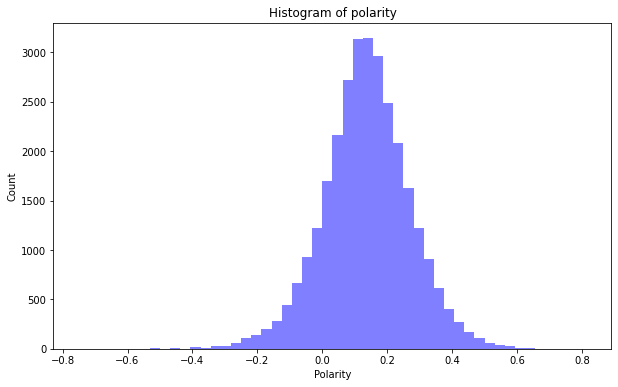

In [ ]:
#Draw a histogram that shows the distribution of polority: Count vs. polarity
from wordcloud import WordCloud
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(clean_sample.sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

### Word embeddings using BERT Glove Word2Vec FastText


In [ ]:
# Install bert-sklearn from GitHub
# bert-sklearn automatically creates a BERT neural network with sklearn
!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .

Cloning into 'bert-sklearn'...
remote: Enumerating objects: 259, done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 259
Receiving objects: 100% (259/259), 516.15 KiB | 4.74 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Processing /content/bert-sklearn
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 132 kB 12.9 MB/s 
     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 8.7 MB 8.6 MB/s 
     |████████████████████████████████| 138 kB 10.3 MB/s 
     |████████████████████████████████| 127 kB 49.9 MB/s 
  Created wheel for bert-sklearn: filename

In [ ]:
# Word_embeddings_BERT_Glove_Word2Vec_FastText
from bert_sklearn import BertClassifier
from IPython.display import clear_output
from os import chdir
chdir("/content/bert-sklearn")
clear_output()


In [ ]:
# Build BERT model
bert = BertClassifier(bert_model = "bert-base-cased")
# biobert = BertClassifier(bert_model = "biobert-base-cased")
# scibert = BertClassifier(bert_model = "scibert-scivocab-cased")

# Fit BERT model
bert = bert.fit(clean_sample["Review"], clean_sample["Stars"])

Building sklearn text classifier...


100%|██████████| 213450/213450 [00:00<00:00, 800139.95B/s]


Loading bert-base-cased model...


100%|██████████| 433/433 [00:00<00:00, 45791.42B/s]


Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 27000, validation data size: 3000



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training  :   0%|          | 0/844 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/bert_sklearn/model/pytorch_pretrained/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


KeyboardInterrupt: ignored

To perform a word embeddings analysis, set up the workspace by installing `zeugma`.

In [ ]:
# Install zeugma
!pip install zeugma

Create an `EmbeddingTransformer` object for your chosen deep learning method. Zeugma supports: glove (by Stanford), word2vec (by Google), and fasttext (by Facebook).

In [ ]:
from zeugma.embeddings import EmbeddingTransformer

# Optional: clear output from installing zeugma
from IPython.display import clear_output
clear_output()

In [ ]:
glove = EmbeddingTransformer("glove")
word2vec = EmbeddingTransformer("word2vec")
fasttext = EmbeddingTransformer("fasttext")

To transform the text into vectors, simply use the `transform` method.

In [ ]:
# Transform text into vectors
text = clean_sample["Review"]
vectors = glove.transform(text)

# Preview vectors
print(vectors[:10])

[[-3.32901888e-02  8.67047682e-02  1.01982616e-01 -4.06976640e-02
  -1.43883809e-01 -1.12221912e-02  1.28037000e+00 -3.39047432e-01
  -1.18679047e-01 -2.79608667e-01 -1.05050936e-01  3.78518850e-01
  -4.62995720e+00  1.91994876e-01  1.49694249e-01  1.27602711e-01
   2.17146218e-01 -1.76361740e-01 -1.70052394e-01 -2.19904408e-01
  -3.26643616e-01  7.03346580e-02 -8.34027678e-02 -1.83460921e-01
  -2.79914677e-01]
 [ 3.96227948e-02  1.79201260e-01  6.81952760e-02 -5.35861403e-02
  -1.24579012e-01 -4.25235741e-02  1.21839797e+00 -3.67489487e-01
  -1.61127359e-01 -2.44805202e-01 -9.11400318e-02  2.97995657e-01
  -4.61843538e+00  9.17840078e-02  7.01435953e-02  6.95573315e-02
   2.59148091e-01 -1.53600678e-01 -8.49927664e-02 -2.81012416e-01
  -2.44575381e-01  1.03403218e-01 -5.44465818e-02 -9.74038467e-02
  -2.99727708e-01]
 [ 2.42656469e-02  1.76091760e-01  8.40683207e-02 -8.13439712e-02
  -1.88830361e-01 -1.83178354e-02  1.14061046e+00 -5.18200278e-01
  -1.79506719e-01 -1.23763695e-01 -1.0

#### Now the vectors can be used to train machine learning models. 

In [ ]:
#Check clean_sample head
clean_sample.head(5)

,Movie,Date,Stars,Useful Votes,Total Votes,Review,Type,Genre,sentiment,subjectivity
371320,One Day,4/14/2012,7,0.0,0.0,"The plot of the film is very simple, every 15t...",movie,Thriller,0.182656,<bound method Series.apply of 371320 The pl...
276967,The Hunger Games Mockingjay Part 2,11/29/2015,9,20.0,45.0,"Before you prepare the tomatoes, we must first...",NaN,NaN,0.118534,<bound method Series.apply of 371320 The pl...
39037,Olympus Has Fallen,2/7/2014,3,0.0,2.0,I think the movie has good contents in the eff...,movie,"Action,Thriller",0.100370,<bound method Series.apply of 371320 The pl...
205278,Oblivion,9/15/2013,7,1.0,2.0,"When we are talking about sci-fi movies, there...",movie,"Adventure,Comedy,Crime",0.173485,<bound method Series.apply of 371320 The pl...
353195,Buried,10/2/2012,8,0.0,1.0,"Simply put, this movie fires on all cylinders....",movie,Documentary,0.181227,<bound method Series.apply of 371320 The pl...


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Optional: turn off warnings about model convergence
from warnings import filterwarnings
filterwarnings("ignore")

# Split data into training and test portions
X = clean_sample.Review
y = clean_sample.Stars
X_train, X_test, y_train, y_test = train_test_split(vectors, y, random_state=1)

# Train machine learning model
clf = MLPClassifier()
clf = clf.fit(X_train, y_train)

# Output machine learning model performance
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.29      0.64      0.40       754
           2       0.00      0.00      0.00       321
           3       0.22      0.00      0.01       412
           4       0.20      0.00      0.01       435
           5       0.19      0.02      0.04       538
           6       0.13      0.01      0.02       727
           7       0.21      0.32      0.25       991
           8       0.22      0.41      0.28      1163
           9       0.21      0.10      0.13      1012
          10       0.35      0.45      0.39      1147

    accuracy                           0.26      7500
   macro avg       0.20      0.20      0.15      7500
weighted avg       0.22      0.26      0.20      7500

